In [115]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Text(0, 0.5, 'Height')

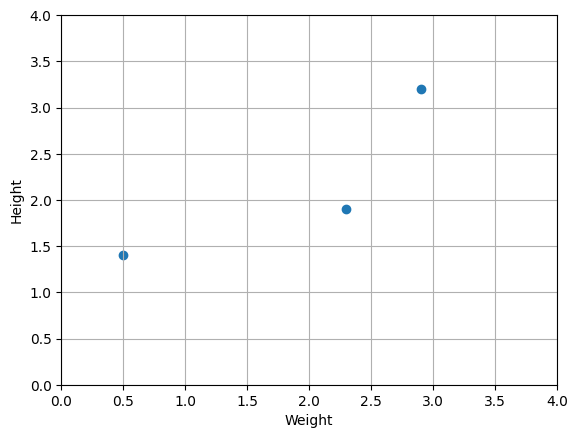

In [116]:
height = [1.4, 1.9, 3.2]
weight = [0.5, 2.3, 2.9]

plt.scatter(weight, height)
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.grid(True)
plt.xlabel("Weight")
plt.ylabel("Height")

In [117]:
def get_slope(x_values, observed_y, intercept):
    squared_residuals = []
    step_size = []
    for x, y in zip(x_values, observed_y):
        squared_residuals.append((y - (intercept + 0.64 * x)) ** 2)
        step_size.append(-2 * (y - (intercept + 0.64 * x)))
    return sum(squared_residuals), sum(step_size)

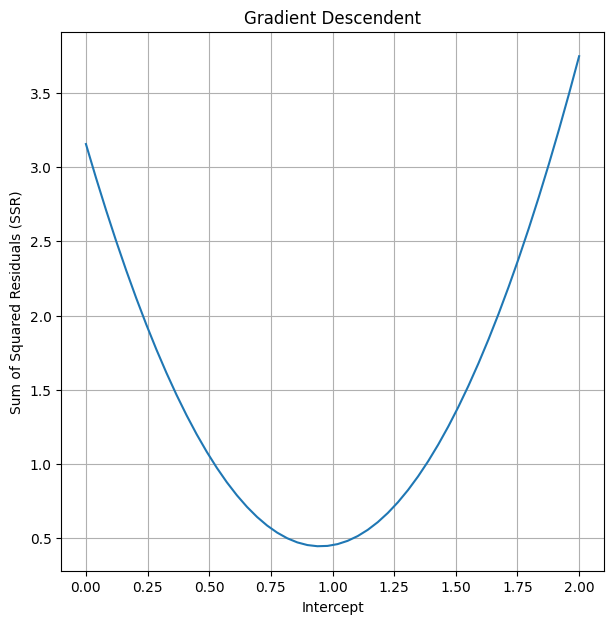

In [118]:
graph_x = np.linspace(0, 2)
graph_y = [get_slope(weight, height, intercept)[0] for intercept in graph_x]

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(graph_x, graph_y, label="SSR")
point_plot, = ax.plot([], [], 'o', color='orange')
tangent_line, = ax.plot([], [], '-')

ax.set_xlabel("Intercept")
ax.set_ylabel("Sum of Squared Residuals (SSR)")
ax.set_title("Gradient Descendent")
ax.grid(True)

In [119]:
learning_rate = 0.3
max_steps = 200
intercept = 0.1
iterations = 0

In [120]:
intercepts = []
ssr_values = []
slopes = []

for i in range(max_steps):
    print(f"Iteração {i + 1} ===============================")
    print(f"Old Intercept: {intercept}")
    ssr, slope = get_slope(weight, height, intercept)
    intercepts.append(intercept)
    ssr_values.append(ssr)
    slopes.append(slope)

    step_size = learning_rate * slope
    intercept = intercept - step_size

    print(f"Step Size: {step_size}")
    print(f"New Intercept: {intercept}")

    iterations += 1

    if ssr < 0.445:
        break

def update(frame):
    intercept = intercepts[frame]
    ssr = ssr_values[frame]
    slope = slopes[frame]

    point_plot.set_data([intercept], [ssr])

    x_tan = np.linspace(min(graph_x), max(graph_x))
    y_tan = ssr + slope * (x_tan - intercept)
    tangent_line.set_data(x_tan, y_tan)

    return point_plot, tangent_line

anim = FuncAnimation(fig, update, frames=iterations, interval=100, blit=True)

HTML(anim.to_jshtml())

Iteração 1 ===============================
Old Intercept: 0.1
Step Size: -1.5312
New Intercept: 1.6312
Iteração 2 ===============================
Old Intercept: 1.6312
Step Size: 1.2249599999999998
New Intercept: 0.40624000000000016
Iteração 3 ===============================
Old Intercept: 0.40624000000000016
Step Size: -0.9799679999999996
New Intercept: 1.3862079999999999
Iteração 4 ===============================
Old Intercept: 1.3862079999999999
Step Size: 0.7839743999999997
New Intercept: 0.6022336000000001
Iteração 5 ===============================
Old Intercept: 0.6022336000000001
Step Size: -0.6271795199999998
New Intercept: 1.2294131199999998
Iteração 6 ===============================
Old Intercept: 1.2294131199999998
Step Size: 0.5017436159999996
New Intercept: 0.7276695040000002
Iteração 7 ===============================
Old Intercept: 0.7276695040000002
Step Size: -0.4013948927999999
New Intercept: 1.1290643968
Iteração 8 ===============================
Old Intercept: 1.1290